In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
sns.set_style("whitegrid")

#Import Data

In [ ]:
df = pd.read_csv("world-happiness-report.csv")

In [ ]:
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


#Importing list of regions

In [ ]:
df_region=pd.read_csv("List_of_countries_by_regional_classification_1.csv")

In [ ]:
df_region.head()

,Country,Region,Global South
0,Andorra,Europe,Global North
1,United Arab Emirates,Middle east,Global South
2,Afghanistan,Asia & Pacific,Global South
3,Antigua and Barbuda,South/Latin America,Global South
4,Anguilla,South/Latin America,Global South


Creating a new column with Country's region

In [ ]:
region=[]
for index, row in df.iterrows():
    region.append(df_region[df_region["Country"]==row['Country name']].squeeze()['Region'])

df['Region']=region #adding new column region

In [ ]:
df['Region'].isnull().sum() #everything got a value for region

0

In [ ]:
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Region
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,Asia & Pacific
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,Asia & Pacific
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,Asia & Pacific
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,Asia & Pacific
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,Asia & Pacific


#Fill bold textnull values with mean score of the column

In [ ]:
for column in df.drop(['Country name', 'Region'],axis=1).columns:
  df[column] = df[column].fillna(df.groupby('Region')[column].transform('mean'))

#One Hot Encoding Region

In [ ]:
df_onehot=pd.get_dummies(df['Region'])

In [ ]:
df.drop('Region',inplace=True, axis=1)
df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


In [ ]:
df=df.join(df_onehot)

Country name - Irrelevant

In [ ]:
df.drop('Country name', inplace=True,axis=1)
df

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Africa,Arab States,Asia & Pacific,Europe,Middle east,North Africa,North America,South/Central America,South/Latin America
0,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,0,0,1,0,0,0,0,0,0
1,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,0,0,1,0,0,0,0,0,0
2,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,0,0,1,0,0,0,0,0,0
3,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,0,0,1,0,0,0,0,0,0
4,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1944,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209,1,0,0,0,0,0,0,0,0
1945,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224,1,0,0,0,0,0,0,0,0
1946,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212,1,0,0,0,0,0,0,0,0
1947,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235,1,0,0,0,0,0,0,0,0


**Split data and target**

Predicting Life Ladder-Happiness score or subjective well-being. This is the national average response to the question of life evaluations.

In [ ]:
X=df.drop('Life Ladder', axis=1)
y=df['Life Ladder']

#**PCA**

Correlation

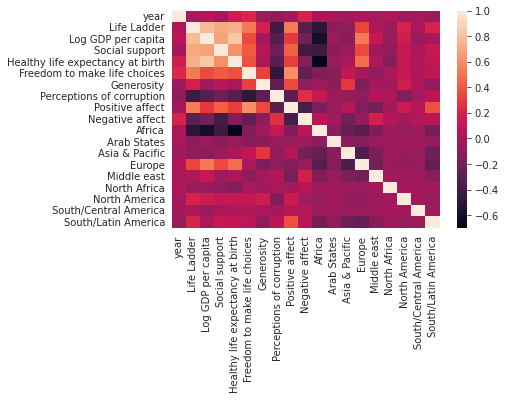

In [ ]:
import seaborn as sns
sns.heatmap(df.corr());

#**Implementing the model**

Splitting Data to train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42, shuffle=True)

##Standard Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardizing the features
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

##Min Max Scaling

In [ ]:
# from sklearn.preprocessing import  MinMaxScaler
# scaler= MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test=scaler.transform(X_test)

##PCA with 0.95 variance

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
principalComponents = pca.fit_transform(X_train)
X_train = pd.DataFrame(data = principalComponents)

In [ ]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2.664158,0.568397,0.492957,1.465257,0.506789,-0.254175,-0.352493,-0.094213,-0.425789,0.207629,-0.108691,-0.242703,-0.902540
1,-0.336817,0.610556,-1.532786,-1.251407,-1.064341,0.367503,-0.332714,0.134343,-0.038829,-0.473206,-1.688747,0.772398,0.136821
2,0.150767,-2.238435,-0.102649,0.137669,-0.396701,-0.165108,-0.584914,-0.028122,0.213298,0.737190,0.107576,-0.377050,-0.400288
3,2.229183,0.743171,-1.690471,-1.352333,0.786107,0.594094,-0.537509,0.043861,-0.076574,0.925546,0.844942,0.837008,0.936564
4,-0.771548,-2.715020,-0.682226,0.711810,-0.616639,0.316365,-0.589228,0.078846,-0.154370,0.180400,-1.321006,0.053379,0.513542


In [ ]:
X_test=pca.transform(X_test) #decopositing 

In [ ]:
X_train.var()

0     4.021333
1     2.160830
2     1.435878
3     1.311573
4     1.287508
5     1.107175
6     1.080604
7     1.017098
8     1.001387
9     0.946966
10    0.749292
11    0.612711
12    0.393243
dtype: float64

##Kernel Poly

In [ ]:
start = dt.now()
svr_poly = SVR(kernel="poly")
svr_poly.fit(X_train, y_train)
running_secs = (dt.now() - start).seconds
running_secs

0

##Kerner Linear

In [ ]:
start = dt.now()
svr_lin = SVR(kernel="linear")
svr_lin.fit(X_train, y_train)
running_secs = (dt.now() - start).seconds
running_secs

0

##Kernel RBF

In [ ]:
start = dt.now()
svr_rbf = SVR(kernel="rbf")
svr_rbf.fit(X_train, y_train)
running_secs = (dt.now() - start).seconds
running_secs

0

##Grid Search for SVR

RBF

In [ ]:
tuned_parameters = [
     {'C': [ 0.5, 1,5,7,10,100], 
      'gamma': [1, 0.75, 0.5, 0.1, 0.01],
      'kernel': ['rbf']      
     }
]

grid_search_rbf = GridSearchCV(estimator = SVR(), param_grid = tuned_parameters, 
                      cv = 3, n_jobs = -1)

In [ ]:
start = dt.now()
grid_search_rbf.fit(X_train, y_train)
running_secs = (dt.now() - start).seconds
running_secs

12

In [ ]:
grid_search_rbf.best_params_ 

{'C': 5, 'gamma': 0.1, 'kernel': 'rbf'}

Linear

In [ ]:
tuned_parameters = [
     {'C': [ 0.5, 1,5,7,8,10,100], 
      'kernel': ['linear']     
     }
]

grid_search_lin = GridSearchCV(estimator = SVR(), param_grid = tuned_parameters, 
                      cv = 3, n_jobs = -1)

In [ ]:
start = dt.now()
grid_search_lin.fit(X_train, y_train)
running_secs = (dt.now() - start).seconds
running_secs

21

In [ ]:
grid_search_lin.best_params_ 

{'C': 1, 'kernel': 'linear'}

poly

In [ ]:
tuned_parameters = [
     {'C': [ 0.5, 1,5,7,10,100], 
      'gamma':['scale'],
      'kernel': ['poly'],
     }
]

grid_search_poly = GridSearchCV(estimator = SVR(), param_grid = tuned_parameters, 
                      cv = 3, n_jobs = -1)

In [ ]:
start = dt.now()
grid_search_poly.fit(X_train, y_train)
running_secs = (dt.now() - start).seconds
running_secs

9

In [ ]:
grid_search_poly.best_params_ 

{'C': 1, 'kernel': 'poly'}

#**Predictions**

##Best kernel and parameters


RBF

In [ ]:
start = dt.now()
rbf_best = SVR(kernel="rbf", C=5, gamma=0.1)
rbf_best.fit(X_train, y_train)
running_secs = (dt.now() - start).seconds
running_secs

0

In [ ]:
y_pred_best=rbf_best.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mean_absolute_error(y_test, y_pred_best)

0.3191251101445684

In [ ]:
r2_score(y_test, y_pred_best)

0.8621844016624289

Prediction for training

In [ ]:
from sklearn.metrics import r2_score
y_pred_train_rbf=rbf_best.predict(X_train)
r2_score(y_train, y_pred_train_rbf)

0.911635651180469

In [ ]:
mean_absolute_error(y_train, y_pred_train_rbf)

0.2299352547214025

##Other kernels and hyperparameters

In [ ]:
y_pred_lin=svr_lin.predict(X_test)
print(r2_score(y_test, y_pred_lin),mean_absolute_error(y_test, y_pred_lin))

0.7708016379534125 0.4220173857676848


In [ ]:
y_pred_rbf=svr_rbf.predict(X_test)
print(r2_score(y_test, y_pred_rbf),mean_absolute_error(y_test, y_pred_rbf))

0.8424915519171385 0.34536426541353626


In [ ]:
y_pred_poly=svr_poly.predict(X_test)
print(r2_score(y_test, y_pred_poly),mean_absolute_error(y_test, y_pred_poly))

0.8233121462375059 0.37278483623150327


In [ ]:
svr_poly.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

#KNN Implementation

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)
y_pred=knn_model.predict(X_test)

In [ ]:
r2_score(y_test, y_pred)

0.8356218937413591

In [ ]:
mean_absolute_error(y_test, y_pred)

0.35636410256410256

In [ ]:
svr_rbf._gamma

0.05843496237704889